# **Settings**

In [1]:
# # Colab에 한글폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,052 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and di

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ! pip install koreanize-matplotlib

In [1]:
# system
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/메타버스 아카데미/메타버스아카데미 6월 프로젝트/data/KCYPS2018')
import warnings
warnings.filterwarnings('ignore')                                    # warning 출력 false
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/메타버스 아카데미/Data")

# dataframe
import pickle
import numpy as np
import pandas as pd

# plot
import matplotlib as mpl
import matplotlib.pyplot as plt
# import koreanize_matplotlib
import seaborn as sns

# model
from sklearn.preprocessing import StandardScaler                    # 데이터 표준화
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV                    # Grid Search
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 한글 폰트 등록
plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False       # 마이너스 기호 깨짐 방지
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# **1. 데이터 불러오기**

In [2]:
# 데이터 불러오기
data = pd.read_csv('datasets/final_data2.csv')
print(data.shape)
data = data.drop(columns=['ID','ID_w'])
data

(15712, 27)


,조사년도,나이,거주지,성별,월평균가구소득,월평균사교육비,부모님대화시간,학습시간,자기관리,여가시간,...,보호자_만족행복,보호자_자아인식,보호자_끈기,친구관계,교사관계,양육태도,학업성취만족도_차이,학교생활만족도_차이,아동_스마트폰의존도,보호자_스마트폰의존도
0,2018,10,1,2,7,25,6.0,1.875,3.75,3.750,...,2.444444,2.4,2.375,2.384615,2.785714,2.833333,1,0,1.933333,1.733333
1,2018,10,1,2,5,35,6.5,2.375,2.75,4.000,...,2.111111,2.5,2.625,2.538462,2.500000,3.000000,1,0,1.666667,2.133333
2,2018,10,1,2,5,20,5.0,1.875,3.00,3.750,...,2.666667,2.4,2.500,2.846154,2.571429,2.541667,1,0,1.666667,2.200000
3,2018,10,1,1,7,40,6.5,3.000,3.25,1.875,...,2.666667,2.5,2.500,2.615385,2.714286,2.791667,2,0,1.466667,1.466667
4,2018,10,1,1,6,25,4.0,1.375,6.75,3.500,...,3.000000,2.7,2.750,2.692308,3.785714,2.625000,1,1,1.600000,1.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15707,2021,16,17,1,5,100,2.5,2.625,2.00,3.375,...,2.666667,2.5,2.250,2.615385,2.857143,2.291667,0,1,2.000000,1.333333
15708,2021,16,17,1,3,0,3.5,1.625,1.25,4.000,...,2.888889,2.6,2.500,2.692308,3.571429,2.666667,0,3,3.266667,1.533333
15709,2021,16,17,1,8,95,2.5,6.125,2.00,2.375,...,2.666667,2.5,2.625,2.384615,3.500000,2.500000,-2,2,2.133333,1.200000
15710,2021,16,17,1,5,50,5.5,4.250,4.75,2.500,...,2.888889,2.7,2.625,2.846154,3.214286,2.666667,-1,1,1.533333,1.133333


# **2. 데이터 분할하기**

In [3]:
# 데이터 분할
X = data.drop(columns=['아동_정서문제'])
y = data['아동_정서문제']

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터를 표준화
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)
print(f'X_train={X_train.shape}, X_test={X_test.shape}, y_train={y_train.shape}, y_test={y_test.shape}')
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=100)
print(f'X_train={X_train.shape}, X_val={X_val.shape}, y_train={y_train.shape}, y_val={y_val.shape}')

data_dict = {'X_train':X_train, 'X_test':X_test, 'X_val':X_val, 'y_train':y_train, 'y_test':y_test,'y_val':y_val}

X_train=(12569, 24), X_test=(3143, 24), y_train=(12569,), y_test=(3143,)
X_train=(11312, 24), X_val=(1257, 24), y_train=(11312,), y_val=(1257,)


# **2. AutoML**

* Lazypredict 에서 모든 모델들에 대해 AutoML을 진행하고자 했으나, 리소스 용량 부족으로 인해 더 이상 실행되지 않는 문제가 발생했다.
* 이에 대한 대안으로 Pycaret을 이용하여 상위 5개의 모델을 추출한 후, 이를 Lazypredict에도 넣어본 결과, 순위가 같은 것으로 나타났다.
* 따라서 최종적으로 5개의 모델을 선정하고, GridSearchCV를 통해 최적의 parameter를 찾아보았다.

## **1) Pycaret**

In [ ]:
!pip install pycaret

,Description,Value
0,Session id,8348
1,Target,아동_정서문제
2,Target type,Regression
3,Original data shape,"(15712, 25)"
4,Transformed data shape,"(15712, 25)"
5,Transformed train set shape,"(10998, 25)"
6,Transformed test set shape,"(4714, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2639,0.1138,0.3373,0.5003,0.1169,0.1496,7.2570
lightgbm,Light Gradient Boosting Machine,0.2640,0.1148,0.3388,0.4959,0.1169,0.1484,0.4880
rf,Random Forest Regressor,0.2664,0.1163,0.3409,0.4896,0.1180,0.1508,11.1170
gbr,Gradient Boosting Regressor,0.2722,0.1192,0.3452,0.4765,0.1193,0.1534,2.1220
xgboost,Extreme Gradient Boosting,0.2728,0.1239,0.3518,0.4561,0.1216,0.1531,1.8400
ridge,Ridge Regression,0.2825,0.1267,0.3558,0.4438,0.1230,0.1590,0.1270
lar,Least Angle Regression,0.2825,0.1267,0.3558,0.4438,0.1230,0.1590,0.2230
br,Bayesian Ridge,0.2825,0.1267,0.3558,0.4438,0.1230,0.1591,0.1820
lr,Linear Regression,0.2825,0.1267,0.3558,0.4438,0.1230,0.1590,0.6550
huber,Huber Regressor,0.3057,0.1475,0.3838,0.3528,0.1319,0.1714,0.4100


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

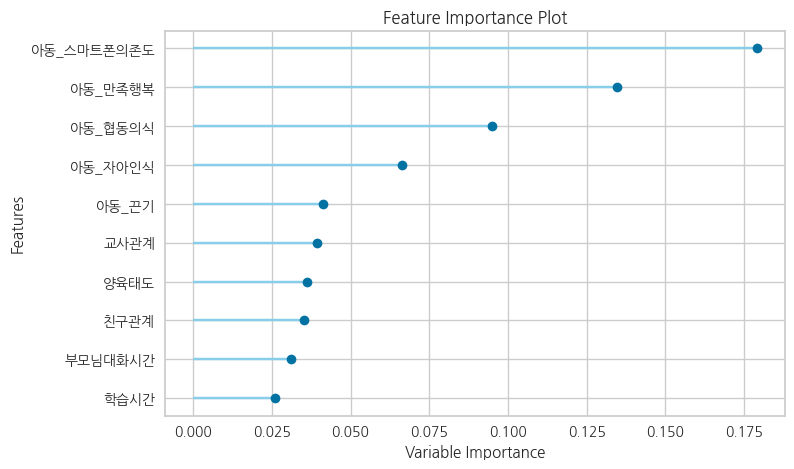

In [ ]:
from pycaret.regression import *

# 데이터 로드

# 회귀 모델 설정 및 훈련
reg = setup(data=data, target='아동_정서문제')
best_model = compare_models()

# 특성 중요도 시각화
plot_model(best_model, plot='feature')


## **2) Lazypredict**

In [ ]:
! pip install lazypredict

In [ ]:
# 사용할 커스텀 모델들
from sklearn.ensemble import ExtraTreesRegressor

my_models = [RandomForestRegressor,GradientBoostingRegressor,
             ExtraTreesRegressor,XGBRegressor,LGBMRegressor]

reg = LazyRegressor(ignore_warnings=True, regressors=my_models)
reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 5/5 [00:25<00:00,  5.19s/it]


(                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
 Model                                                                     
 ExtraTreesRegressor                      0.50       0.50  0.33        7.33
 RandomForestRegressor                    0.49       0.50  0.34       13.04
 LGBMRegressor                            0.49       0.49  0.34        0.30
 GradientBoostingRegressor                0.47       0.48  0.34        3.64
 XGBRegressor                             0.45       0.46  0.35        1.61,
                            Adjusted R-Squared  R-Squared  RMSE  Time Taken
 Model                                                                     
 ExtraTreesRegressor                      0.50       0.50  0.33        7.33
 RandomForestRegressor                    0.49       0.50  0.34       13.04
 LGBMRegressor                            0.49       0.49  0.34        0.30
 GradientBoostingRegressor                0.47       0.48  0.34        3.64
 XGBRegress

# **3. Model 비교**

* 과적합 방지를 위한 노력
    * early stopping option 추가
    * validation set을 추가
    * 분석이 끝난 후 비교를 위한 시각화

In [6]:
def get_model_scores(model, data_dict, use=2):
    X_train = data_dict['X_train']
    X_test = data_dict['X_test']
    y_train = data_dict['y_train']
    y_test = data_dict['y_test']
    X_val = data_dict['X_val']
    y_val = data_dict['y_val']

    if use == 1:
        eval_results = {}
        model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)],
                  verbose=True, early_stopping_rounds=10)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)

    print(f'>>> Train Data')
    print(f'## Model. {model.__class__.__name__}')
    print(f'##  MSE : {mse:.4f}')
    print(f'## RMSE : {rmse:.4f}')

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'>>> Test Data')
    print(f'## Model. {model.__class__.__name__}')
    print(f'##  MSE : {mse:.4f}')
    print(f'## RMSE : {rmse:.4f}')

    if use == 1:
        result = {'model':model, 'eval_results':eval_results}
    else:
        result = model
    return result

## **1) Random Forest Regressor**

In [11]:
model_rf = RandomForestRegressor(n_estimators=1000)

params = {
    'max_depth': [10,12,14],                # 트리 깊이
    'min_samples_split': [2,5,10],          # 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1,3,5]             # 리프 노드에 필요한 최소 샘플 수
}

grid_model = GridSearchCV(model_rf, param_grid=params, scoring='neg_mean_squared_error',cv=3, verbose=1)
grid_model.fit(X_train, y_train)

scores_data = pd.DataFrame(grid_model.cv_results_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [12]:
with open('datasets/model_rf_grid.pkl', 'wb') as f:
    pickle.dump(grid_model, f)

In [14]:
print(f'## Model. {grid_model.__class__.__name__} CV = {3}')
print(f'## optimal parameter : {grid_model.best_params_}')
print(f'## optimal score : {np.sqrt(-1* grid_model.best_score_)}')

## Model. GridSearchCV CV = 3
## optimal parameter : {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}
## optimal score : 0.3465993484040164


In [22]:
# RandomForest
model_rf2 = RandomForestRegressor(n_estimators=1000,max_depth=14,min_samples_leaf=1,min_samples_split=2)
model_result = get_model_scores(model_rf2, data_dict,use=2)

>>> Train Data
## Model. RandomForestRegressor
##  MSE : 0.0326
## RMSE : 0.1807
>>> Test Data
## Model. RandomForestRegressor
##  MSE : 0.1124
## RMSE : 0.3353


In [23]:
with open('datasets/model_rf.pkl', 'wb') as f:
    pickle.dump(model_rf2, f)

## **2) Extra Trees Regressor**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model_extra = RandomForestRegressor(n_estimators=1000)

params = {
    'max_depth': [10,12,14],                # 트리 깊이
    'min_samples_split': [2,5,10],          # 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1,3,5]             # 리프 노드에 필요한 최소 샘플 수
}

grid_model = GridSearchCV(model_extra, param_grid=params, scoring='neg_mean_squared_error',cv=3, verbose=1)
grid_model.fit(X_train, y_train)

scores_data = pd.DataFrame(grid_model.cv_results_)

In [ ]:
with open('datasets/model_extra_grid.pkl', 'wb') as f:
    pickle.dump(grid_model, f)

In [ ]:
print(f'## Model. {grid_model.__class__.__name__} CV = {3}')
print(f'## optimal parameter : {grid_model.best_params_}')
print(f'## optimal score : {np.sqrt(-1* grid_model.best_score_)}')

## Model. GridSearchCV CV = 3
## optimal parameter : {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}
## optimal score : 0.3465993484040164


In [34]:
# Extra
model_extra = RandomForestRegressor(n_estimators=1000,max_depth=14,min_samples_leaf=1,min_samples_split=2)
model_result = get_model_scores(model_extra, data_dict,use=2)

>>> Train Data
## Model. RandomForestRegressor
##  MSE : 0.0327
## RMSE : 0.1809
>>> Test Data
## Model. RandomForestRegressor
##  MSE : 0.1125
## RMSE : 0.3355


## **5) LightGBM Regressor**

In [25]:
from sklearn.ensemble import ExtraTreesRegressor

model_lgbm = RandomForestRegressor(n_estimators=1000)

params = {
    'max_depth': [10,12,14],                # 트리 깊이
    'min_samples_split': [2,5,10],          # 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1,3,5]             # 리프 노드에 필요한 최소 샘플 수
}

grid_model = GridSearchCV(model_lgbm, param_grid=params, scoring='neg_mean_squared_error',cv=3, verbose=1)
grid_model.fit(X_train, y_train)

scores_data = pd.DataFrame(grid_model.cv_results_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
with open('datasets/model_lgbm_grid.pkl', 'wb') as f:
    pickle.dump(grid_model, f)

In [26]:
print(f'## Model. {grid_model.__class__.__name__} CV = {3}')
print(f'## optimal parameter : {grid_model.best_params_}')
print(f'## optimal score : {np.sqrt(-1* grid_model.best_score_)}')

## Model. GridSearchCV CV = 3
## optimal parameter : {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}
## optimal score : 0.34658265137564814


In [68]:
# LightGBM
model_lgb = LGBMRegressor(n_estimators=1000,max_depth=12,min_child_samples=30)
model_lgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)],
              verbose=True, early_stopping_rounds=10)


[1]	training's l2: 0.213875	valid_1's l2: 0.211074
[2]	training's l2: 0.199933	valid_1's l2: 0.197443
[3]	training's l2: 0.188362	valid_1's l2: 0.185951
[4]	training's l2: 0.178641	valid_1's l2: 0.176214
[5]	training's l2: 0.170438	valid_1's l2: 0.168109
[6]	training's l2: 0.16329	valid_1's l2: 0.161622
[7]	training's l2: 0.156988	valid_1's l2: 0.155563
[8]	training's l2: 0.151702	valid_1's l2: 0.150893
[9]	training's l2: 0.146831	valid_1's l2: 0.146336
[10]	training's l2: 0.142769	valid_1's l2: 0.142906
[11]	training's l2: 0.139125	valid_1's l2: 0.1394
[12]	training's l2: 0.135979	valid_1's l2: 0.137011
[13]	training's l2: 0.132956	valid_1's l2: 0.134271
[14]	training's l2: 0.130369	valid_1's l2: 0.131606
[15]	training's l2: 0.128088	valid_1's l2: 0.129477
[16]	training's l2: 0.12562	valid_1's l2: 0.127386
[17]	training's l2: 0.123476	valid_1's l2: 0.125863
[18]	training's l2: 0.121644	valid_1's l2: 0.12455
[19]	training's l2: 0.119876	valid_1's l2: 0.123257
[20]	training's l2: 0.1181

LGBMRegressor(max_depth=12, min_child_samples=30, n_estimators=1000)

In [69]:
y_pred = model_lgb.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

print(f'>>> Train Data')
print(f'## Model. {model_lgb.__class__.__name__}')
print(f'##  MSE : {mse:.4f}')
print(f'## RMSE : {rmse:.4f}')

y_pred = model_lgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'>>> Test Data')
print(f'## Model. {model_lgb.__class__.__name__}')
print(f'##  MSE : {mse:.4f}')
print(f'## RMSE : {rmse:.4f}')

>>> Train Data
## Model. LGBMRegressor
##  MSE : 0.0656
## RMSE : 0.2560
>>> Test Data
## Model. LGBMRegressor
##  MSE : 0.1114
## RMSE : 0.3337


Text(0.5, 1.0, 'LGBMRegressor')

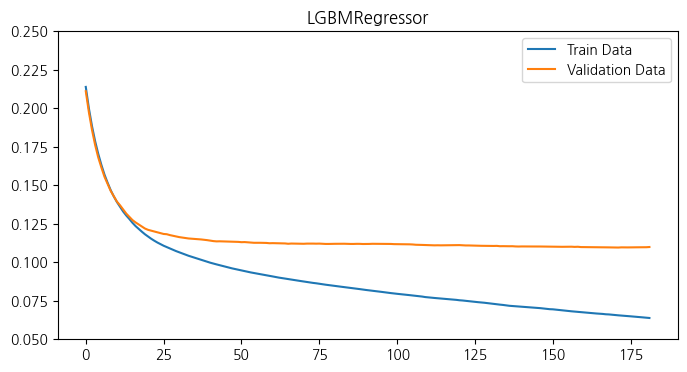

In [71]:
results = model_lgb.evals_result_

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(results['training']['l2'], label='Train Data')
ax.plot(results['valid_1']['l2'], label='Validation Data')
ax.legend(loc='upper right')
ax.set_ylim((0.05, 0.25))
ax.set_title(f'{model_lgb.__class__.__name__}')

In [43]:
model_lgb.feature_name_
model_lgb.feature_importances_

array([ 38,  40,  91,  31,  43,  68,  66, 105,  61,  93, 227, 211, 165,
       170,  48,  42,  44, 148,  98, 142,  29,  55, 129,  76], dtype=int32)

In [59]:
X.columns[:10]

Index(['조사년도', '나이', '거주지', '성별', '월평균가구소득', '월평균사교육비', '부모님대화시간', '학습시간',
       '자기관리', '여가시간'],
      dtype='object')

In [80]:
bar_data = pd.DataFrame()
bar_data['name'] = X.columns
bar_data['importance'] = model_lgb.feature_importances_
bar_data = bar_data.sort_values(by='importance', ascending=True)
bar_data

,name,importance
3,성별,68
0,조사년도,73
20,학업성취만족도_차이,74
21,학교생활만족도_차이,105
1,나이,115
16,보호자_끈기,134
4,월평균가구소득,137
15,보호자_자아인식,143
14,보호자_만족행복,166
6,부모님대화시간,191


Text(0.5, 1.0, 'LightGBM 모형 > 중요도 변수')

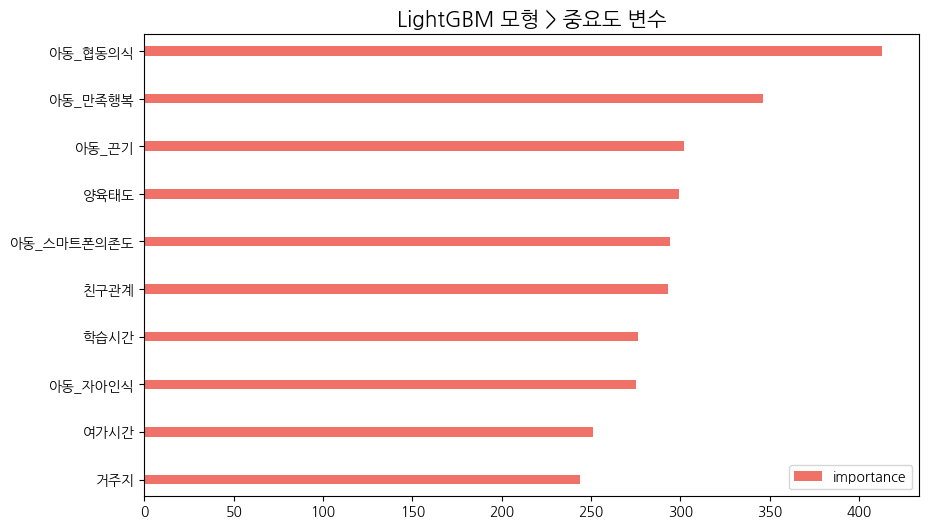

In [97]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_data.iloc[-10:,].plot.barh(width=0.2, color = '#f07167', ax=ax)
ax.set(yticklabels=bar_data['name'][-10:])
ax.set_title('LightGBM 모형 > 중요도 변수', size=15)

# **4. 모델 선택**

# **5. 중요도 높은 변수 추출**

In [100]:
data.sort_values(by='아동_정서문제',ascending=False).iloc[0,:]

조사년도           2018.000000
나이               13.000000
거주지               1.000000
성별                1.000000
월평균가구소득           3.000000
월평균사교육비          10.000000
부모님대화시간           7.000000
학습시간              4.375000
자기관리              1.750000
여가시간              4.250000
아동_정서문제           3.916667
아동_협동의식           4.000000
아동_만족행복           2.000000
아동_자아인식           3.000000
아동_끈기             4.000000
보호자_만족행복          3.111111
보호자_자아인식          2.900000
보호자_끈기            3.000000
친구관계              4.000000
교사관계              2.500000
양육태도              3.875000
학업성취만족도_차이        3.000000
학교생활만족도_차이       -2.000000
아동_스마트폰의존도        1.133333
보호자_스마트폰의존도       1.800000
Name: 7770, dtype: float64